# Navier-Stokes equation

References:
https://piazza.com/bu/spring2013/me702/resources
https://github.com/barbagroup/CFDPython

The Navier-Stokes equation is given as
$$\dfrac{\partial\vec V}{\partial t} + (\vec V \cdot \nabla)\vec V = - \dfrac{\nabla p}{\rho} + \nu \nabla^2\vec V$$
where $(\vec V \cdot \nabla)\vec V$ is the convective terms with first order spatial derivatives, $- \dfrac{\nabla p}{\rho}$ represents the gradient of pressure divided by density, and $\nu \nabla^2\vec V$ is the diffusive term that involves the second order derivatives in space.
There are various modeling assumptions and numerical methods that can simplify the equation based on different physical phenomena.

Let's get start with the easiest case.
## 1-D linear convection

In [50]:
using Pkg

In [161]:
Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `C:\Users\andre\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\andre\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [1]:
using Plots,LaTeXStrings

In [2]:
plotly()

Plots.PlotlyBackend()

The equation is simplified to the following wave propagation equation 
$$\dfrac{\partial u}{\partial t} + c\dfrac{\partial u}{\partial x} = 0$$
where $c$ is the constant transport velocity.
In this situation, call the initial state of the system $u(x,t=0)=u_0(x)$; after time $t$, the system is displaced with distance $x=ct$ so that $u(x,t)=u_0(x-ct)$.

Space-time discretication: use $i$ as the index of grid in $x$, use $n$ as the index of grid in t. Use forward difference(FD) in time and backward difference(BD) in space.

The equation in the discrete format looks like 
$$ \dfrac{u_i ^{n+1}-u_i ^n}{\Delta t} + c\dfrac{u_i ^n-u_{i-1} ^n}{\Delta x} = 0$$

Rearrange the equation we get the expression for $u_i^{n+1}$
$$u_i^{n+1} = u_i^n + c\dfrac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$
Assume the initial conditions(I.C.)
$$ u = 2 \text{ for } 0.5 \leq x \leq 1 $$ $$u = 1 \text{ for everywhere else in (0,2)} $$
We also need to define the boundary conditions(B.C.)
$$u = 1 \text{ for } x=0,2$$

In [12]:
function one_linearconv(nx,nt,dt,c)
    #nx is the number of grid points in x
    #dx is the distance between any pair of adjacent grid points
    #nt is the number of timesteps we want to calculate
    #dt is the amount of time each timestep covers (delta t)
    #c is the wavespeed
    dx = 2 / (nx - 1)
    u = ones(nx)
    u[Int(round(.5/dx+1)):Int(round(1/dx+1))] .= 2 #setting u = 2 between 0.5 and 1 as per our I.C.s
    un = ones(nx)
    for n in range(1,stop=nt,step=1)  #loop for values of n from 1 to nt, so it will run nt times
        un = copy(u) #copy the existing values of u into un
        # set the boundary condition
        #u[1] = 0
        #u[end] = 0
        for i in range(2, stop = nx-1, step = 1)
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        end
    end
    u
end

one_linearconv (generic function with 1 method)

In [13]:
plot()
for nt = 0:5:50
    plot!(range(0,stop = 2, length = 41),one_linearconv(41,nt,0.025,1),
        title = "1-D Linear Convection After nt",color=:black,legend=false)
end
plot!()

## 1-D diffusion

The equation becomes
$$\dfrac{\partial u}{\partial t}=-\nu \dfrac{\partial^2u}{\partial x^2}$$
where $\nu$ is the diffusion parameter called viscosity(treated as constant), and this equation is in the same form as the heat equation if $u$ is temperature.

Looking for solution of type
$$u = \hat{u}e^{i(kx-\omega t)}$$
Let 
$$i\omega=\nu k^2$$
we have
$$u = \hat{u}e^{ikx}e^{-\nu k^2t}$$
Notice here we have an exponential damping term $e^{-\nu k^2t}$.
If $\nu > 0$, physical diffusion process; if $nu < 0$, exponentially growing to explosion.

Space-time discretication: use $i$ as the index of grid in $x$, use $n$ as the index of grid in t. Use forward difference(FD) in time and centre difference(CD) in space.

Discretize the equation
$$\dfrac{u_i^{n+1}-u_i^n}{\Delta t}=\nu\dfrac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{\Delta x^2}$$
$$u_i^{n+1}=u_i^n+\nu\dfrac{\Delta t}{\Delta x^2}(u_{i+1}^n-2u_i^n+u_{i-1}^n)$$

Using the same I.C. and B.C. as before, 
$$ u = 2 \text{ for } 0.5 \leq x \leq 1 $$ $$u = 1 \text{ for everywhere else in (0,2)} $$
$$u = 0 \text{ for } x=0,2$$

In [94]:
function one_diffusion(nx,nt,dt,vis)
    #nx is the number of grid points in x
    #dx is the distance between any pair of adjacent grid points
    #nt is the number of timesteps we want to calculate
    #dt is the amount of time each timestep covers (delta t)
    #vis is the viscosity constant
    dx = 2 / (nx - 1)
    u = ones(nx)
    u[Int(round(.5/dx+1)):Int(round(1/dx+1))] .= 2 #setting u = 2 between 0.5 and 1 as per our I.C.s
    un = ones(nx)
    for n in range(1,stop=nt,step=1)  #loop for values of n from 1 to nt, so it will run nt times
        un = copy(u) #copy the existing values of u into un
        # set the boundary condition
        #u[1] = 0
        #u[end] = 0
        for i in range(2, stop = nx-1, step = 1)
            u[i] = un[i] + vis*dt/dx/dx*(un[i+1]-2*un[i]+un[i-1])
        end
    end
    u
end

one_diffusion (generic function with 1 method)

In [107]:
plot()
for nt = 0:5:50
    plot!(range(0,stop = 2, length = 41),one_diffusion(41,nt,0.01,0.1),
        title = "1-D Diffussion After nt",color=:black,legend=false)
end
plot!()

## 1-D nonlinear convection

Solve
$$\dfrac{\partial u}{\partial t} + u\dfrac{\partial u}{\partial x} = 0$$
Discretization
$$\dfrac{u_i^{n+1}-u_i^n}{\Delta t}+u_i^n\dfrac{u_i^n-u_{i-1}^n}{\Delta x}=0$$
$$u_i^{n+1}=u_i^n-u_i^n\dfrac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

In [91]:
function one_nonlinearconv(nx,nt,dt)
    #nx is the number of grid points in x
    #dx is the distance between any pair of adjacent grid points
    #nt is the number of timesteps we want to calculate
    #dt is the amount of time each timestep covers (delta t)
    dx = 2 / (nx - 1)
    u = ones(nx)
    u[Int(round(.5/dx+1)):Int(round(1/dx+1))] .= 2 #setting u = 2 between 0.5 and 1 as per our I.C.s
    un = ones(nx)
    for n in range(1,stop=nt,step=1)  #loop for values of n from 1 to nt, so it will run nt times
        un = copy(u) #copy the existing values of u into un
        # set the boundary condition
        #u[1] = 0
        #u[end] = 0
        for i in range(2, stop = nx-1, step = 1)
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        end
    end
    u
end

one_nonlinearconv (generic function with 1 method)

In [202]:
plot()
for nt = 0:5:50
    plot!(range(0,stop = 2, length = 41),one_nonlinearconv(41,nt,0.025),
        title = "1-D nonlinear convection After nt",color=:black,legend=false)
end
plot!()

## 1-D Burgers' equation

Now we combine the above cases to solve
$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}=\nu \dfrac{\partial^2u}{\partial x^2}$$
Discretization
$$\dfrac{u_i^{n+1}-u_i^n}{\Delta t}+u_i^n\dfrac{u_i^n-u_{i-1}^n}{\Delta x}=\nu\dfrac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{\Delta x^2}$$
$$u_i^{n+1}=u_i^n-u_i^n\dfrac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)+\nu\dfrac{\Delta t}{\Delta x^2}(u_{i+1}^n-2u_i^n+u_{i-1}^n)$$

I.C.
$$u = -2\nu\dfrac{\partial \phi/ \partial x}{\phi} + 4$$
$$\phi = e^{-\dfrac{x^2}{4\nu}}+e^{-\dfrac{(x-2\pi)^2}{4\nu}}$$

B.C.
$$n(0) = n(2\pi)$$

Analytical solution
$$u = -2\nu\dfrac{\partial \phi/ \partial x}{\phi} + 4$$
$$\phi = e^{-\dfrac{(x-4t)^2}{4\nu(t+1)}}+e^{-\dfrac{(x-4t-2\pi)^2}{4\nu(t+1)}}$$

In [198]:
function one_Burgers(nx,nt,sigma,vis)
    #nx is the number of grid points in x
    #dx is the distance between any pair of adjacent grid points
    #nt is the number of timesteps we want to calculate
    #dt is the amount of time each timestep covers (delta t)
    #vis is the viscosity constant
    dx = 2*pi / (nx - 1)
    dt = sigma * dx
    u = zeros(nx)
    
    #auxilary variables for difference formulas
    ipl = zeros(nx)
    iml = zeros(nx)
    x = zeros(nx)
    
    #periodic boundary conditions
    for i = 1:nx
        ipl[i] = i+1
        iml[i] = i-1
        x[i] = (i-1)*dx
    end
    ipl[nx] = 1
    iml[1] = nx
    
    #initialization
    for i = 1:nx
        phi = exp(-(x[i])^2/4/vis) + exp(-(x[i]-2*pi)^2/4/vis)
        dphi = -0.5/vis*x[i]*exp(-x[i]^2/4/vis)
                - 0.5/vis*(x[i]-2*pi)*exp(-(x[i]-2*pi)^2/4/vis)
        u[i]=-2*vis*dphi/phi+4
    end
    #do the timesteps
    for it = 1:nt+1
        un = copy(u)
        for i = 1:nx
            u[i] = un[i]-un[i]*dt/dx*(un[i]-un[Int(round(iml[i]))])+
            vis*dt/dx^2*(un[Int(round(ipl[i]))]-2*un[i]+un[Int(round(iml[i]))])    
        end
    end
    u
end

one_Burgers (generic function with 1 method)

In [200]:
plot()
for nt = 0:5:100
    plot!(range(0,stop = 2*pi, length = 101),one_Burgers(101,nt,0.07,0.07),
        title = "1-D Burgers After nt",color=:black,legend=false)
end
plot!()

## 2-D linear convection

Solving
$$\dfrac{\partial u}{\partial t}+c\dfrac{\partial u}{\partial x}+c\dfrac{\partial u}{\partial y}=0$$
Discretization
$$\dfrac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t}+c\dfrac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x}
+c\dfrac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$
$$u_{i,j}^{n+1}=u_{i,j}^n-c\dfrac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)
-c\dfrac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$
I.C.
\begin{equation}
  u(x,y)=\begin{cases}
    2 & \text{for $0.5\leq x,y\leq 1$}\\
    1 & \text{for everywhere else}
  \end{cases}
\end{equation}
B.C.
\begin{equation}
  u(x,y)= 1 \text{for} \begin{cases}
    x = 0,2\\
    y= 0,2
  \end{cases}
\end{equation}


In [11]:
function two_linearconv(nx,ny,nt,sigma,c)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma * dx
    u = ones(ny,nx)
    u[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    for n in range(1,stop=nt + 1,step=1) #loop across number of time steps
        un = copy(u)
        u[2:end, 2:end] = @. (un[2:end, 2:end] - (c * dt / dx * (un[2:end, 2:end] - un[2:end, 1:end-1])) -
            (c * dt / dy * (un[2:end, 2:end] - un[1:end-1, 2:end])))
        u[1, :] .= 1
        u[end, :] .= 1
        u[:, 1] .= 1
        u[:, end] .= 1
    end
    u
end

two_linearconv (generic function with 1 method)

In [111]:
x = range(0, stop=2, length=81)|> collect
y = range(0, stop=2, length=81)|> collect
theme(:ggplot2)
surface(x,y,two_linearconv(81,81,150,0.2,1),
    title = "2-D Linear Convection After nt",xlims=(0,2),ylims=(0,2),zlims=(1,2))

## 2-D nonlinear convection

Solving
$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}=0$$
$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}=0$$
Discretization
$$\dfrac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t}+u_{i,j}^n\dfrac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x}
+v_{i,j}^n\dfrac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$
$$\dfrac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t}+u_{i,j}^n\dfrac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x}
+v_{i,j}^n\dfrac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y}=0$$
Rearrange the equations
$$u_{i,j}^{n+1}=u_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)
-v_{i,j}^n\dfrac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$
$$v_{i,j}^{n+1}=v_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(v_{i,j}^n-v_{i-1,j}^n)
-v_{i,j}^n\dfrac{\Delta t}{\Delta y}(v_{i,j}^n-v_{i,j-1}^n)$$
I.C.
\begin{equation}
  u,v=\begin{cases}
    2 & \text{for $0.5\leq x,y\leq 1$}\\
    1 & \text{for everywhere else}
  \end{cases}
\end{equation}
B.C.
\begin{equation}
  u,v= 1 \text{for} \begin{cases}
    x = 0,2\\
    y= 0,2
  \end{cases}
\end{equation}

In [13]:
function two_nonlinearconv1(nx,ny,nt,dt,c)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    x = range(0, stop=2, length=nx)|> collect
    y = range(0, stop=2, length=ny)|> collect
    u = ones(ny,nx)
    v = ones(ny,nx)
    for i = 1:nx
        for j = 1:ny
            if 0.5 <= x[i] <= 1 && 0.5 <= y[j] <= 1
                u[i,j] = 2
                v[i,j] = 2
            else
                u[i,j] = 1
                v[i,j] = 1
            end
        end
    end
    for it = 1:nt
        un = copy(u)
        vn = copy(v)
        for i = 2:nx-1
            for j = 2:ny-1
                u[i,j] = un[i,j] - un[i,j]*dt/dx*(un[i,j]-un[i-1,j]) - vn[i,j]*dt/dy*(un[i,j]-un[i,j-1])
                v[i,j] = vn[i,j] - un[i,j]*dt/dx*(vn[i,j]-vn[i-1,j]) - vn[i,j]*dt/dy*(vn[i,j]-vn[i,j-1])
            end
        end
    end
    u,v
end

two_nonlinearconv1 (generic function with 1 method)

In [110]:
x = range(0, stop=2, length=20)|> collect
y = range(0, stop=2, length=20)|> collect
theme(:ggplot2)
p1 = surface(x,y,two_nonlinearconv1(20,20,0,0.01,1)[1],xlims=(0,2),ylims=(0,2), title = "u")
p2 = surface(x,y,two_nonlinearconv1(20,20,50,0.01,1)[2],xlims=(0,2),ylims=(0,2), title = "v")
plot(p1, p2, layout = 2)

This is the array operation version.

In [15]:
function two_nonlinearconv2(nx,ny,nt,sigma,c)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma * dx / c
    u = ones(ny,nx)
    v = ones(ny,nx)
    u[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    v[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    for n in range(1,stop=nt+1,step=1) #loop across number of time steps
        un = copy(u)
        vn = copy(v)
        u[2:end, 2:end] = @. (un[2:end, 2:end] - c*dt*((un[2:end, 2:end]/dx*(un[2:end, 2:end]-un[2:end, 1:end-1])) +
                (vn[2:end, 2:end]/dy*(un[2:end, 2:end]-un[1:end-1, 2:end]))))
        v[2:end, 2:end] = @. (vn[2:end, 2:end] - c*dt*((un[2:end, 2:end]/dx*(vn[2:end, 2:end]-vn[2:end, 1:end-1])) +
                (vn[2:end, 2:end]/dy*(vn[2:end, 2:end]-vn[1:end-1, 2:end]))))   
        u[1, :] .= 1
        u[end, :] .= 1
        u[:, 1] .= 1
        u[:, end] .= 1
        v[1, :] .= 1
        v[end, :] .= 1
        v[:, 1] .= 1
        v[:, end] .= 1        
    end
    u,v
end

two_nonlinearconv2 (generic function with 1 method)

In [34]:
x = range(0, stop=2, length=101)|> collect
y = range(0, stop=2, length=101)|> collect
theme(:ggplot2)
p1 = surface(x,y,two_nonlinearconv2(101,101,0,0.01,1)[1],xlims=(0,2),ylims=(0,2), title = "u")
p2 = surface(x,y,two_nonlinearconv2(101,101,2000,0.01,1)[2],xlims=(0,2),ylims=(0,2), title = "v")
plot(p1, p2, layout = 2)

## 2-D Diffusion

Solving
$$\dfrac{\partial u}{\partial t}=\nu\dfrac{\partial^2 u}{\partial x^2}+\nu\dfrac{\partial^2 u}{\partial y^2}$$
Discretization
$$\dfrac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t}=\nu\dfrac{u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2}+\nu\dfrac{u_{i,j+1}^n-2u_{i,j}^n+u_{i,j-1}^n}{\Delta y^2}$$
$$u_{i,j}^{n+1}=u_{i,j}^n+\nu\dfrac{\Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n)+\nu\dfrac{\Delta t}{\Delta y^2}(u_{i,j+1}^n-2u_{i,j}^n+u_{i,j-1}^n)$$

In [35]:
function two_diffusion(nx,ny,nt,sigma,vis)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma * dx * dy / vis
    u = ones(ny,nx)
    u[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    for n in range(1,stop=nt + 1,step=1) #loop across number of time steps
        un = copy(u)
        u[2:end-1, 2:end-1] = @. (un[2:end-1,2:end-1]+
            vis*dt/dx^2*(un[2:end-1,3:end]-2*un[2:end-1,2:end-1]+un[2:end-1,1:end-2])
            +vis*dt/dy^2*(un[3:end,2:end-1]-2*un[2:end-1,2:end-1]+un[1:end-2,2:end-1]))
        u[1, :] .= 1
        u[end, :] .= 1
        u[:, 1] .= 1
        u[:, end] .= 1
    end
    u
end

two_diffusion (generic function with 1 method)

In [126]:
x = range(0, stop=2, length=41)|> collect
y = range(0, stop=2, length=41)|> collect
theme(:ggplot2)
surface(x,y,two_diffusion(41,41,30,0.25,0.05),
    xlabel="x",ylabel="y",zlabel="u",xlims=(0,2),ylims=(0,2),zlims=(1,2))

## 2-D Burgers' equation

Solving
$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}
=\nu(\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2})$$
$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}
=\nu(\dfrac{\partial^2 v}{\partial x^2}+\dfrac{\partial^2 v}{\partial y^2})$$
After discretization and rearrangement
$$u_{i,j}^{n+1}=u_{i,j}^n-\dfrac{\Delta t}{\Delta x}u_{i,j}^n(u_{i,j}^n-u_{i-1,j}^n)-\dfrac{\Delta t}{\Delta y}v_{i,j}^n(u_{i,j}^n-u_{i,j-1}^n)+\nu\dfrac{\Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n)
+\nu\dfrac{\Delta t}{\Delta y^2}(u_{i,j+1}^n-2u_{i,j}^n+u_{i,j-1}^n)$$
$$v_{i,j}^{n+1}=v_{i,j}^n-\dfrac{\Delta t}{\Delta x}u_{i,j}^n(v_{i,j}^n-v_{i-1,j}^n)-\dfrac{\Delta t}{\Delta y}v_{i,j}^n(v_{i,j}^n-v_{i,j-1}^n)+\nu\dfrac{\Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n)
+\nu\dfrac{\Delta t}{\Delta y^2}(v_{i,j+1}^n-2v_{i,j}^n+v_{i,j-1}^n)$$

This is the array operation version.

In [83]:
function two_Burgers2(nx,ny,nt,sigma,vis,c)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma * dx * dy / vis
    u = ones(ny,nx)
    v = ones(ny,nx)
    u[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    v[Int(round(.5 / dy + 1)):Int(round(1 / dy + 1)),Int(round(.5 / dx + 1)):Int(round(1 / dx + 1))] .= 2
    for n in range(1,stop=nt + 1,step=1) #loop across number of time steps
        un = copy(u)
        vn = copy(v)
        u[2:end-1,2:end-1]=@.(un[2:end-1,2:end-1]
            -dt/dx*un[2:end-1,2:end-1]*(un[2:end-1,2:end-1]-un[2:end-1,1:end-2])
            -dt/dy*vn[2:end-1,2:end-1]*(un[2:end-1,2:end-1]-un[1:end-2,2:end-1])
            +vis*dt/dx^2*
            (un[2:end-1,3:end]-2*un[2:end-1,2:end-1]+un[2:end-1,1:end-2])
            +vis*dt/dy^2*
            (un[3:end,2:end-1]-2*un[2:end-1,2:end-1]+un[1:end-2,2:end-1]))
        v[2:end-1,2:end-1]=@.(vn[2:end-1,2:end-1]
            -dt/dx*un[2:end-1,2:end-1]*(vn[2:end-1,2:end-1]-vn[2:end-1,1:end-2])
            -dt/dy*vn[2:end-1,2:end-1]*(vn[2:end-1,2:end-1]-vn[1:end-2,2:end-1])
            +vis*dt/dx^2*
            (vn[2:end-1,3:end]-2*vn[2:end-1,2:end-1]+vn[2:end-1,1:end-2])
            +vis*dt/dy^2*
            (vn[3:end,2:end-1]-2*vn[2:end-1,2:end-1]+vn[1:end-2,2:end-1]))        
        u[1, :] .= 1
        u[end, :] .= 1
        u[:, 1] .= 1
        u[:, end] .= 1
        v[1, :] .= 1
        v[end, :] .= 1
        v[:, 1] .= 1
        v[:, end] .= 1        
    end
    u,v    
end

two_Burgers2 (generic function with 1 method)

In [125]:
x = range(0, stop=2, length=41)|> collect
y = range(0, stop=2, length=41)|> collect
theme(:ggplot2)
surface(x,y,two_Burgers2(41,41,900,0.0009,0.01,1),
    xlabel="x",ylabel="y",zlabel="u",xlims=(0,2),ylims=(0,2),zlims=(1,2))

## 2-D Laplace Equation

Solving
$$\dfrac{\partial^2 p}{\partial x^2}+\dfrac{\partial^2 p}{\partial y^2}=0$$
Discretization
$$\dfrac{p_{i+1,j}^n-2p_{i,j}^n+p_{i-1,j}^n}{\Delta x^2}+\dfrac{p_{i,j+1}^n-2p_{i,j}^n+p_{i,j-1}^n}{\Delta y^2}=0$$
$$p_{i,j}^n=\dfrac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n+p_{i,j-1}^n)}{2(\Delta x^2+\Delta y^2)}$$
I.C.
$$p=0 , \text{for everywhere}$$
B.C.
\begin{equation}
  \begin{cases}
    p = 0 & \text{at} & x = 0\\
    p = y & \text{at} & x = 2\\
    \dfrac{\partial p}{\partial y}=0 & \text{at} & y=0,1
  \end{cases}
\end{equation}
The analytical solution is given as
$$p(x,y)=\dfrac{\pi}{4}-4\sum_{n=1,odd}^{\infty} \dfrac{sinh(n\pi x)cos(n\pi y)}{(n\pi)^2sinh(2n\pi)}$$

In [39]:
function two_laplace(y,nx,ny,l1norm_target)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    l1norm = 1
    p = zeros(ny,nx)
    pn = zeros(ny,nx)
    while l1norm > l1norm_target
        pn = copy(p)
        p[2:end-1, 2:end-1] = @. ((dy^2 * (pn[2:end-1, 3:end] + pn[2:end-1, 1:end-2]) +
                dx^2 * (pn[3:end, 2:end-1] + pn[1:end-2, 2:end-1])) /
                        (2 * (dx^2 + dy^2)))
        p[:, 1] .= 0  # p = 0 @ x = 0
        p[:, end] = y  # p = y @ x = 2
        p[1, :] = p[2, :]  # dp/dy = 0 @ y = 0
        p[end, :] = p[end-1, :]  # dp/dy = 0 @ y = 1
        l1norm = (sum(map(x->abs(x),p[:]) - map(x->abs(x),pn[:])) /
                sum(map(x->abs(x),pn[:])))        
    end
    p
end

two_laplace (generic function with 1 method)

In [40]:
x = range(0, stop=2, length=31)|> collect
y = range(0, stop=1, length=31)|> collect
theme(:ggplot2)
surface(x,y,two_laplace(y,31,31,1e-4),xlabel="x",ylabel="y",zlabel="p",xlims=(0,2),ylims=(0,1),zlims=(0,1))

## 2-D Poisson Equation

Solving
$$\dfrac{\partial^2 p}{\partial x^2}+\dfrac{\partial^2 p}{\partial y^2}=b$$
Discretization
$$\dfrac{p_{i+1,j}^n-2p_{i,j}^n+p_{i-1,j}^n}{\Delta x^2}+\dfrac{p_{i,j+1}^n-2p_{i,j}^n+p_{i,j-1}^n}{\Delta y^2}=b_{i,j}^n$$
$$p_{i,j}^n=\dfrac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n+p_{i,j-1}^n)-b_{i,j}^n\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$
I.C.
$$p=0\text{,for everywhere}$$
B.C.
$$p=0 \text{,at} x=0, 2 \text{and} y=0, 1$$
the source term consists of two initial spikes inside the domain
\begin{equation}
  \begin{cases}
    b_{i,j} = 100 & \text{at} & i = \dfrac{1}{4}nx, j = \dfrac{1}{4}ny\\
    b_{i,j} = -100 & \text{at} & i = \dfrac{3}{4}nx, j = \dfrac{3}{4}ny\\
    b = 0 & \text{everywhere else}
  \end{cases}
\end{equation}

In [41]:
function two_Poisson(nx,ny,nt)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    p = zeros(ny,nx)
    pn = zeros(ny,nx)
    b = zeros(ny,nx)
    # Source
    b[Int(round(ny / 4 + 1)), Int(round(nx / 4 +1))]  = 100
    b[Int(round(3 * ny / 4 + 1)), Int(round(3 * nx / 4 + 1))] = -100
    for it in 1:nt
        pn = copy(p)
        p[2:end-1, 2:end-1] = @. (((pn[2:end-1, 3:end] + pn[2:end-1, 1:end-2]) * dy^2 +
                (pn[3:end, 2:end-1] + pn[1:end-2, 2:end-1]) * dx^2 -
                    b[2:end-1, 2:end-1] * dx^2 * dy^2) / 
                    (2 * (dx^2 + dy^2)))
        p[1, :] .= 0
        p[ny, :] .= 0
        p[:, 1] .= 0
        p[:,nx] .= 0
    end
    p
end

two_Poisson (generic function with 1 method)

In [42]:
x = range(0, stop=2, length=50)|> collect
y = range(0, stop=2, length=50)|> collect
theme(:ggplot2)
surface(x,y,xlabel="x",ylabel="y",zlabel="p",two_Poisson(50,50,100))

## 2-D Incompressible Cavity Flow with Navier–Stokes

Assume incompressible flow, so that $\rho$ is constant.
Solving

$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}
=-\dfrac{1}{\rho}\dfrac{\partial p}{\partial x}+\nu(\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2})$$

$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}
=-\dfrac{1}{\rho}\dfrac{\partial p}{\partial y}+\nu(\dfrac{\partial^2 v}{\partial x^2}+\dfrac{\partial^2 v}{\partial y^2})$$

$$\dfrac{\partial^2 p}{\partial x^2}+\dfrac{\partial^2 p}{\partial y^2}
=-\rho(\dfrac{\partial u}{\partial x}\dfrac{\partial u}{\partial x}+2\dfrac{\partial u}{\partial y}\dfrac{\partial v}{\partial x}+\dfrac{\partial v}{\partial y}\dfrac{\partial v}{\partial y})$$

After discretization and rearrangement (needs some patience)

$$u_{i,j}^{n+1}=u_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-
v_{i,j}^n\dfrac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)-\dfrac{\Delta t}{2\rho\Delta x}(p_{i+1,j}^n-p_{i-1,j}^n)+
\nu[\dfrac{\Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n)+
\dfrac{\Delta t}{\Delta y^2}(u_{i,j+1}^n-2u_{i,j}^n+u_{i,j-1}^n)]$$

$$v_{i,j}^{n+1}=v_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(v_{i,j}^n-v_{i-1,j}^n)-
v_{i,j}^n\dfrac{\Delta t}{\Delta y}(v_{i,j}^n-v_{i,j-1}^n)-\dfrac{\Delta t}{2\rho\Delta x}(p_{i,j+1}^n-p_{i,j-1}^n)+
\nu[\dfrac{\Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n)+
\dfrac{\Delta t}{\Delta y^2}(v_{i,j+1}^n-2v_{i,j}^n+v_{i,j-1}^n)]$$

$$p_{i,j}^n=\dfrac{(p_{i+1,j}^n+p_{i-1,j}^n)\Delta y^2+(p_{i,j+1}^n+p_{i,j-1}^n)\Delta x^2}{2(\Delta x^2+\Delta y^2)}
-\dfrac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}\times
[\dfrac{1}{\Delta t}(\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\dfrac{u_{i,j+1}-u_{i,j-1}}{2\Delta y})
-\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
-2\dfrac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\dfrac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\dfrac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\dfrac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}]$$

I.C.
$$u,v,p = 0 \text{,everywhere}$$

B.C.
$$u=1 \text{,at} y=2$$
$$u,v = 0 \text{,on the other boundaries}$$
$$\dfrac{\partial p}{\partial y}=0 \text{,at} y=0$$
$$p=0\text{,at}y=2$$
$$\dfrac{\partial p}{\partial x}=0 \text{,at} x=0,2$$

The function "build_b" represents the contents of the square brackets in the expression of $p_{i,j}^n$.

In [7]:
function build_b(b, rho, dt, u, v, nx, ny)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)    
    b[2:end-1, 2:end-1] = @. (rho * (1 / dt * 
            ((u[2:end-1, 3:end] - u[2:end-1, 1:end-2]) / 
                (2 * dx) + (v[3:end, 2:end-1] - v[1:end-2, 2:end-1]) / (2 * dy)) -
            ((u[2:end-1, 3:end] - u[2:end-1, 1:end-2]) / (2 * dx))^2 -
                      2 * ((u[3:end, 2:end-1] - u[1:end-2, 2:end-1]) / (2 * dy) *
                           (v[2:end-1, 3:end] - v[2:end-1, 1:end-2]) / (2 * dx))-
            ((v[3:end, 2:end-1] - v[1:end-2, 2:end-1]) / (2 * dy))^2))
    b
end

build_b (generic function with 1 method)

In [8]:
function pressure_poisson(p, nx, ny, nit, b)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    for q in 1:nit
        pn = copy(p)
        p[2:end-1, 2:end-1] = @. (((pn[2:end-1, 3:end] + pn[2:end-1, 1:end-2]) * dy^2 + 
                (pn[3:end, 2:end-1] + pn[1:end-2, 2:end-1]) * dx^2) /
                          (2 * (dx^2 + dy^2)) -
                          dx^2 * dy^2 / (2 * (dx^2 + dy^2)) * 
                          b[2:end-1,2:end-1])
        p[:, end] = p[:, end-1] # dp/dx = 0 at x = 2
        p[1, :] = p[2, :]   # dp/dy = 0 at y = 0
        p[:, 1] = p[:, 2]   # dp/dx = 0 at x = 0
        p[end, :] .= 0        # p = 0 at y = 2
    end
    p
end

pressure_poisson (generic function with 1 method)

In [9]:
function cavity_flow(nit, nt, dt, nx, ny, rho, nu)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    u = zeros(ny, nx)
    v = zeros(ny, nx)
    p = zeros(ny, nx)
    b = zeros(ny, nx)   
    for n in 1:nt
        un = copy(u)
        vn = copy(v)        
        b = build_b(b, rho, dt, u, v, nx, ny)
        p = pressure_poisson(p, nx, ny, nit, b)        
        u[2:end-1, 2:end-1] = @. (un[2:end-1, 2:end-1]-
                         un[2:end-1, 2:end-1] * dt / dx *
            (un[2:end-1, 2:end-1] - un[2:end-1, 1:end-2]) -
                         vn[2:end-1, 2:end-1] * dt / dy *
                        (un[2:end-1, 2:end-1] - un[1:end-2, 2:end-1]) -
            dt / (2 * rho * dx) * (p[2:end-1, 3:end] - p[2:end-1, 1:end-2]) +
                         nu * (dt / dx^2 *
                        (un[2:end-1, 3:end] - 2 * un[2:end-1, 2:end-1] + un[2:end-1, 1:end-2]) +
                         dt / dy^2 *
                        (un[3:end, 2:end-1] - 2 * un[2:end-1, 2:end-1] + un[1:end-2, 2:end-1])))
        v[2:end-1,2:end-1] = @. (vn[2:end-1, 2:end-1] -
                        un[2:end-1, 2:end-1] * dt / dx *
            (vn[2:end-1, 2:end-1] - vn[2:end-1, 1:end-2]) -
                        vn[2:end-1, 2:end-1] * dt / dy *
                       (vn[2:end-1, 2:end-1] - vn[1:end-2, 2:end-1]) -
                        dt / (2 * rho * dy) * (p[3:end, 2:end-1] - p[1:end-2, 2:end-1]) +
                        nu * (dt / dx^2 *
                       (vn[2:end-1, 3:end] - 2 * vn[2:end-1, 2:end-1] + vn[2:end-1, 1:end-2]) +
                        dt / dy^2 *
                       (vn[3:end, 2:end-1] - 2 * vn[2:end-1, 2:end-1] + vn[1:end-2, 2:end-1])))
        u[1, :]  .= 0
        u[:, 1]  .= 0
        u[:, end] .= 0
        u[end, :] .= 1    # set velocity on cavity lid equal to 1
        v[1, :]  .= 0
        v[end, :] .= 0
        v[:, 1]  .= 0
        v[:, end] .= 0
    end
    u, v, p
end

cavity_flow (generic function with 1 method)

In [28]:
u, v, p = cavity_flow(50, 700, 0.001, 41, 41, 1, 0.1);

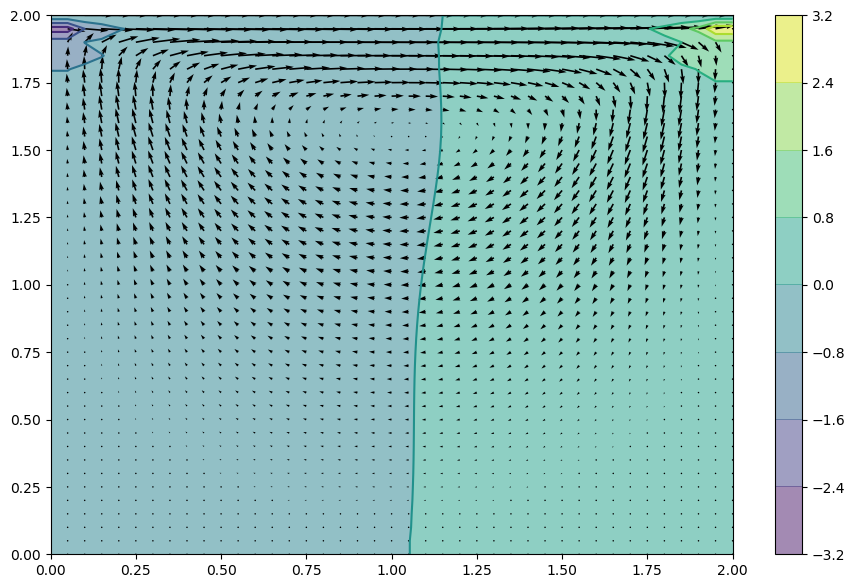

PyObject <matplotlib.quiver.Quiver object at 0x000000003FEDA160>

In [29]:
using PyPlot
x = range(0, stop=2, length=41)|> collect
y = range(0, stop=2, length=41)|> collect
fig = PyPlot.figure(figsize=(11, 7), dpi=100)
PyPlot.contourf(x, y, p, alpha=0.5)
PyPlot.colorbar()
PyPlot.contour(x, y, p)
PyPlot.quiver(x,y,u,v)

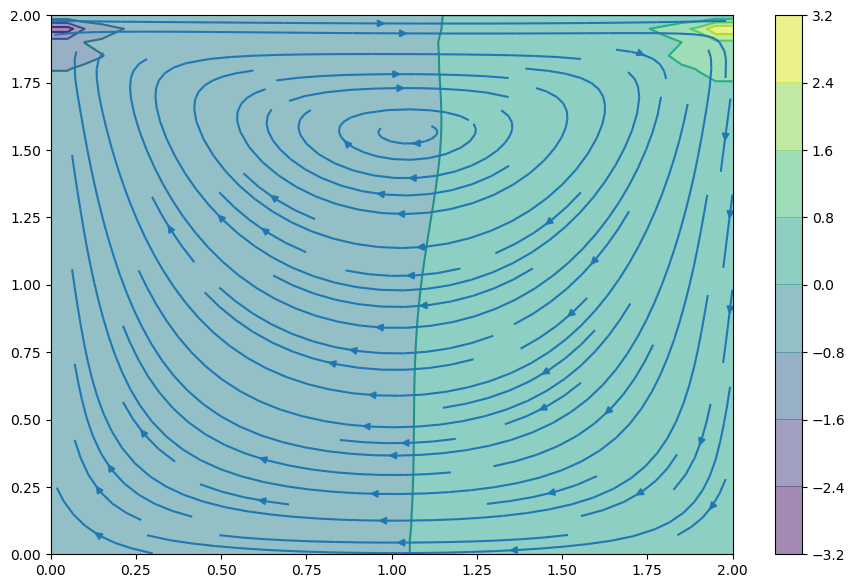

PyObject <matplotlib.streamplot.StreamplotSet object at 0x0000000042B84A20>

In [18]:
fig = PyPlot.figure(figsize=(11, 7), dpi=100)
PyPlot.contourf(x, y, p, alpha=0.5)
PyPlot.colorbar()
PyPlot.contour(x, y, p)
PyPlot.streamplot(x,y,u,v)

## 2-D Incompressible Channel Flow with Navier–Stokes

Now add a source term $F$ to the u-momentum equation.

Solving
$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}
=-\dfrac{1}{\rho}\dfrac{\partial p}{\partial x}+\nu(\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2})+F$$

$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}
=-\dfrac{1}{\rho}\dfrac{\partial p}{\partial y}+\nu(\dfrac{\partial^2 v}{\partial x^2}+\dfrac{\partial^2 v}{\partial y^2})$$

$$\dfrac{\partial^2 p}{\partial x^2}+\dfrac{\partial^2 p}{\partial y^2}
=-\rho(\dfrac{\partial u}{\partial x}\dfrac{\partial u}{\partial x}+2\dfrac{\partial u}{\partial y}\dfrac{\partial v}{\partial x}+\dfrac{\partial v}{\partial y}\dfrac{\partial v}{\partial y})$$

After discretization and rearrangement (needs some patience)

$$u_{i,j}^{n+1}=u_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-
v_{i,j}^n\dfrac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)-\dfrac{\Delta t}{2\rho\Delta x}(p_{i+1,j}^n-p_{i-1,j}^n)+
\nu[\dfrac{\Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n)+
\dfrac{\Delta t}{\Delta y^2}(u_{i,j+1}^n-2u_{i,j}^n+u_{i,j-1}^n)]+\Delta tF$$

$$v_{i,j}^{n+1}=v_{i,j}^n-u_{i,j}^n\dfrac{\Delta t}{\Delta x}(v_{i,j}^n-v_{i-1,j}^n)-
v_{i,j}^n\dfrac{\Delta t}{\Delta y}(v_{i,j}^n-v_{i,j-1}^n)-\dfrac{\Delta t}{2\rho\Delta x}(p_{i,j+1}^n-p_{i,j-1}^n)+
\nu[\dfrac{\Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n)+
\dfrac{\Delta t}{\Delta y^2}(v_{i,j+1}^n-2v_{i,j}^n+v_{i,j-1}^n)]$$

$$p_{i,j}^n=\dfrac{(p_{i+1,j}^n+p_{i-1,j}^n)\Delta y^2+(p_{i,j+1}^n+p_{i,j-1}^n)\Delta x^2}{2(\Delta x^2+\Delta y^2)}
-\dfrac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}\times
[\dfrac{1}{\Delta t}(\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\dfrac{u_{i,j+1}-u_{i,j-1}}{2\Delta y})
-\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\dfrac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
-2\dfrac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\dfrac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\dfrac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\dfrac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}]$$

I.C.
$$u,v,p = 0 \text{,everywhere}$$

B.C.
$$u,v,p \text{periodic on} x=0,2$$
$$u,v=0 \text{at} y=0,2$$
$$\dfrac{\partial p}{\partial y}=0 \text{at} y=0,2$$
$$F=1 \text{everywhere}$$

In [19]:
function build_b_periodic(rho, dt, dx, dy, u, v)
    b = copy(u)
    b[2:end-1, 2:end-1] = @. (rho * (1 / dt * ((u[2:end-1, 3:end] - u[2:end-1, 1:end-2]) / (2 * dx) +
                (v[3:end, 2:end-1] - v[1:end-2, 2:end-1]) / (2 * dy)) -
            ((u[2:end-1, 3:end] - u[2:end-1, 1:end-2]) / (2 * dx))^2 -
            2 * ((u[3:end, 2:end-1] - u[1:end-2, 2:end-1]) / (2 * dy) *
                (v[2:end-1, 3:end] - v[2:end-1, 1:end-2]) / (2 * dx))-
            ((v[3:end, 2:end-1] - v[1:end-2, 2:end-1]) / (2 * dy))^2))    
    # Periodic BC Pressure @ x = 2
    b[2:end-1, end] = @. (rho * (1 / dt * ((u[2:end-1, 1] - u[2:end-1,end-1]) / (2 * dx) +
                (v[3:end, end] - v[1:end-2, end]) / (2 * dy)) -
            ((u[2:end-1, 1] - u[2:end-1, end-1]) / (2 * dx))^2 -
            2 * ((u[3:end, end] - u[1:end-2, end]) / (2 * dy) *
                (v[2:end-1, 1] - v[2:end-1, end-2]) / (2 * dx)) -
            ((v[3:end, end] - v[1:end-2, end]) / (2 * dy))^2))
    # Periodic BC Pressure @ x = 0
    b[2:end-1, 1] = @. (rho * (1 / dt * ((u[2:end-1, 2] - u[2:end-1, end]) / (2 * dx) +
                (v[3:end, 1] - v[1:end-2, 1]) / (2 * dy)) -
            ((u[2:end-1, 2] - u[2:end-1, end]) / (2 * dx))^2 -
            2 * ((u[3:end, 1] - u[1:end-2, 1]) / (2 * dy) *
                (v[2:end-1, 2] - v[2:end-1, end]) / (2 * dx))-
            ((v[3:end, 1] - v[1:end-2, 1]) / (2 * dy))^2))  
    b
end

build_b_periodic (generic function with 1 method)

In [20]:
function pressure_poisson_periodic(p, nt, dx, dy, b)
    for q = 1:nt
        pn = copy(p)
        p[2:end-1, 2:end-1] = @. (((pn[2:end-1, 3:end] + pn[2:end-1, 1:end-2]) * dy^2 +
                (pn[3:end, 2:end-1] + pn[1:end-2, 2:end-1]) * dx^2) /
                         (2 * (dx^2 + dy^2)) -
            dx^2 * dy^2 / (2 * (dx^2 + dy^2)) * b[2:end-1, 2:end-1])

        # Periodic BC Pressure @ x = 2
        p[2:end-1, end] = @. (((pn[2:end-1, 1] + pn[2:end-1, end-1])* dy^2 +
                (pn[3:end, end] + pn[1:end-2, end]) * dx^2) /
                       (2 * (dx^2 + dy^2)) -
            dx^2 * dy^2 / (2 * (dx^2 + dy^2)) * b[2:end-1, end])

        # Periodic BC Pressure @ x = 0
        p[2:end-1, 1] = @. (((pn[2:end-1, 2] + pn[2:end-1, end])* dy^2 +
                (pn[3:end, 1] + pn[1:end-2, 1]) * dx^2) /
                      (2 * (dx^2 + dy^2)) -
            dx^2 * dy^2 / (2 * (dx^2 + dy^2)) * b[2:end-1, 1])
        
        # Wall boundary conditions, pressure
        p[end, :] = p[end-1, :]  # dp/dy = 0 at y = 2
        p[1, :] = p[2, :]  # dp/dy = 0 at y = 0
    end
    p
end

pressure_poisson_periodic (generic function with 1 method)

In [34]:
function channel_flow(nit, nt, dt, nx, ny, rho, nu, F, c)
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    u = zeros(ny, nx)
    v = zeros(ny, nx)
    p = ones(ny, nx)
    b = zeros(ny, nx)
    udiff = 1
    stepcount = 0
    while udiff > 0.001
        un = copy(u)
        vn = copy(v)
        b = build_b_periodic(rho, dt, dx, dy, u, v)
        p = pressure_poisson_periodic(p, nt, dx, dy, b)
        u[2:end-1, 2:end-1] = @. (un[2:end-1, 2:end-1] -
                         un[2:end-1, 2:end-1] * dt / dx * 
            (un[2:end-1, 2:end-1] - un[2:end-1, 1:end-2]) -
                         vn[2:end-1, 2:end-1] * dt / dy * 
            (un[2:end-1, 2:end-1] - un[1:end-2, 2:end-1]) -
                         dt / (2 * rho * dx) * 
            (p[2:end-1, 3:end] - p[2:end-1, 1:end-2]) +
                         nu * (dt / dx^2 * 
                (un[2:end-1, 3:end] - 2 * un[2:end-1, 2:end-1] + un[2:end-1, 1:end-2]) +
                         dt / dy^2 * 
                (un[3:end, 2:end-1] - 2 * un[2:end-1, 2:end-1] + un[1:end-2, 2:end-1])) + 
                         F * dt)

        v[2:end-1, 2:end-1] = @. (vn[2:end-1, 2:end-1] -
                         un[2:end-1, 2:end-1] * dt / dx * 
            (vn[2:end-1, 2:end-1] - vn[2:end-1, 1:end-2]) -
                         vn[2:end-1, 2:end-1] * dt / dy * 
            (vn[2:end-1, 2:end-1] - vn[1:end-2, 2:end-1]) -
                         dt / (2 * rho * dy) * 
            (p[3:end, 2:end-1] - p[1:end-2, 2:end-1]) +
                         nu * (dt / dx^2 *
                (vn[2:end-1, 3:end] - 2 * vn[2:end-1, 2:end-1] + vn[2:end-1, 1:end-2]) +
                         dt / dy^2 * 
                (vn[3:end, 2:end-1] - 2 * vn[2:end-1, 2:end-1] + vn[1:end-2, 2:end-1])))

        # Periodic BC u @ x = 2     
        u[2:end-1, end] = @. (un[2:end-1, end] - un[2:end-1, end] * dt / dx * 
            (un[2:end-1, end] - un[2:end-1, end-1]) -
            vn[2:end-1, end] * dt / dy * 
            (un[2:end-1, end] - un[1:end-2, end]) -
                       dt / (2 * rho * dx) *
            (p[2:end-1, 1] - p[2:end-1, end-1]) + 
                       nu * (dt / dx^2 * 
                (un[2:end-1, 1] - 2 * un[2:end-1, end] + un[2:end-1, end-1]) +
                       dt / dy^2 * 
                (un[3:end, end] - 2 * un[2:end-1, end] + un[1:end-2, end])) + F * dt)

        # Periodic BC u @ x = 0
        u[2:end-1, 1] = @. (un[2:end-1, 1] - un[2:end-1, 1] * dt / dx *
            (un[2:end-1, 1] - un[2:end-1, end]) -
            vn[2:end-1, 1] * dt / dy * 
            (un[2:end-1, 1] - un[1:end-2, 1]) - 
                      dt / (2 * rho * dx) * 
            (p[2:end-1, 2] - p[2:end-1, end]) + 
                      nu * (dt / dx^2 * 
                (un[2:end-1, 2] - 2 * un[2:end-1, 1] + un[2:end-1, end]) +
                      dt / dy^2 *
                (un[3:end, 1] - 2 * un[2:end-1, 1] + un[1:end-2, 1])) + F * dt)

        # Periodic BC v @ x = 2
        v[2:end-1, end] = @. (vn[2:end-1, end] - un[2:end-1, end] * dt / dx *
            (vn[2:end-1, end] - vn[2:end-1, end-1]) - 
                       vn[2:end-1, end] * dt / dy *
            (vn[2:end-1, end] - vn[1:end-2, end]) -
                       dt / (2 * rho * dy) * 
            (p[3:end, end] - p[1:end-2, end]) +
                       nu * (dt / dx^2 *
                (vn[2:end-1, 1] - 2 * vn[2:end-1, end] + vn[2:end-1, end-1]) +
                       dt / dy^2 *
                (vn[3:end, end] - 2 * vn[2:end-1, end] + vn[1:end-2, end])))

        # Periodic BC v @ x = 0
        v[2:end-1, 1] = @. (vn[2:end-1, 1] - un[2:end-1, 1] * dt / dx *
            (vn[2:end-1, 1] - vn[2:end-1, end]) -
            vn[2:end-1, 1] * dt / dy *
            (vn[2:end-1, 1] - vn[1:end-2, 1]) -
                      dt / (2 * rho * dy) * 
            (p[3:end, 1] - p[1:end-2, 1]) +
                      nu * (dt / dx^2 * 
                (vn[2:end-1, 1] - 2 * vn[2:end-1, 1] + vn[2:end-1, end]) +
                      dt / dy^2 * 
                (vn[3:end, 1] - 2 * vn[2:end-1, 1] + vn[1:end-2, 1])))
        
        # Wall B.C.: u,v = 0 @ y = 0,2
        u[1, :] .= 0
        u[end, :] .= 0
        v[1, :] .= 0
        v[end, :].=0
    
        udiff = (sum(u) - sum(un)) / sum(u)
        stepcount += 1
    end
    u,v,p
end

channel_flow (generic function with 1 method)

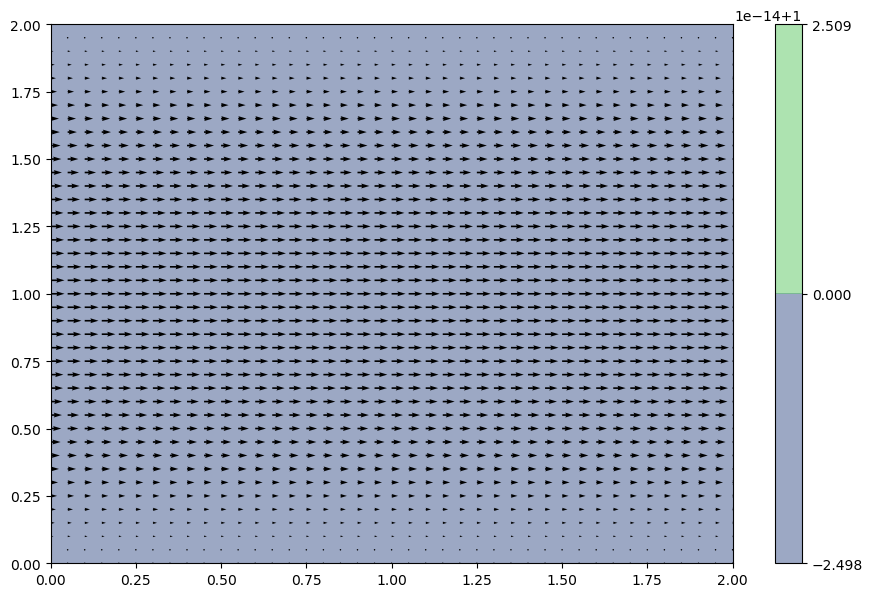

PyObject <matplotlib.quiver.Quiver object at 0x000000004379A160>

In [35]:
x = range(0, stop=2, length=41)|> collect
y = range(0, stop=2, length=41)|> collect
u,v,p = channel_flow(50, 10, 0.01, 41, 41, 1, 0.1, 1, 1)
fig = PyPlot.figure(figsize = (11,7), dpi=100)
PyPlot.contourf(x, y, p, alpha=0.5)
PyPlot.colorbar()
PyPlot.contour(x, y, p)
PyPlot.quiver(x,y,u,v)

## What's next?

*Stability, divergency, error analysis, Von Neumann analysis......

*Different numerical schemes: Leapfrog scheme, Lax-Friedrichs scheme, Lax-Wendroff scheme, Beam-Warming scheme, ......

*Multi-step methods: Richtmyer/Lax-Wendroff method, MacCorneck method......

*Finite Volume Method

*Compressible flow($\rho$ field)

*3D flow